Loading toolboxes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:
data = pd.read_csv('http_info.csv', names = ["id", "date", "user", "pc", "website"])
print(                                                                                                                )
print("A view of data-------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")
print("Summary of the data-------------------------------------------------------------------------------------------")
print(data.describe(include = 'all'))
print("--------------------------------------------------------------------------------------------------------------")
print("Number of missed data-----------------------------------------------------------------------------------------")
print(data.isnull().sum())
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")
print("Data types----------------------------------------------------------------------------------------------------")
print(data.dtypes)
print("--------------------------------------------------------------------------------------------------------------")


A view of data-------------------------------------------------------------------------------------------------
                         id                 date          user       pc  \
0  {M8H9-W9NL75TH-1322KOLO}  01/04/2010 07:08:47  ACME/AMA0606  PC-1514   
1  {V0E1-R0FE91SC-2381GTDZ}  01/04/2010 07:35:19  ACME/DBM0698  PC-1444   
2  {V7C8-H6KA39YG-3352HMOW}  01/04/2010 07:40:40  ACME/HBF0035  PC-0991   
3  {O9P7-D9DL54YQ-9903OMYE}  01/04/2010 07:52:25  ACME/SVC0175  PC-3384   
4  {L3J0-E4RF05KN-7341OQVW}  01/04/2010 07:55:50  ACME/CMU0028  PC-4253   

                     website  
0            http://cnet.com  
1      http://force.open.com  
2    http://tendencystem.org  
3        http://bent.cup.org  
4  http://taxpotato.east.org  
--------------------------------------------------------------------------------------------------------------
Summary of the data-------------------------------------------------------------------------------------------
                            

In [3]:
data.iloc[:,1] = pd.to_datetime(data.iloc[:,1])

data.dtypes

id                 object
date       datetime64[ns]
user               object
pc                 object
website            object
dtype: object

In [4]:
year = data.iloc[:,1].dt.year
data['year'] = year 
#----------------------------------------------------------------------------------------------------------------------

month = data.iloc[:,1].dt.month
data['month'] = month
#----------------------------------------------------------------------------------------------------------------------

week = data.iloc[:,1].dt.week
data['week'] = week
#----------------------------------------------------------------------------------------------------------------------

weekday = data.iloc[:,1].dt.weekday
data['weekday'] = weekday 
#----------------------------------------------------------------------------------------------------------------------

time = data.iloc[:,1].dt.time

Time = []
for i in time:
    d = str(i).replace(':', "")
    Time.append(np.array(d))

data["time"] = Time
#----------------------------------------------------------------------------------------------------------------------

DATE = data.iloc[:,1].dt.date
DATE

ddate = []
for i in DATE:
    d = str(i).replace('-', "")
    ddate.append(np.array(d))

np.array(ddate)
data['numdate'] = ddate

print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")


New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {M8H9-W9NL75TH-1322KOLO} 2010-01-04 07:08:47  ACME/AMA0606  PC-1514   
1  {V0E1-R0FE91SC-2381GTDZ} 2010-01-04 07:35:19  ACME/DBM0698  PC-1444   
2  {V7C8-H6KA39YG-3352HMOW} 2010-01-04 07:40:40  ACME/HBF0035  PC-0991   
3  {O9P7-D9DL54YQ-9903OMYE} 2010-01-04 07:52:25  ACME/SVC0175  PC-3384   
4  {L3J0-E4RF05KN-7341OQVW} 2010-01-04 07:55:50  ACME/CMU0028  PC-4253   

                     website  year  month  week  weekday    time   numdate  
0            http://cnet.com  2010      1     1        0  070847  20100104  
1      http://force.open.com  2010      1     1        0  073519  20100104  
2    http://tendencystem.org  2010      1     1        0  074040  20100104  
3        http://bent.cup.org  2010      1     1        0  075225  20100104  
4  http://taxpotato.east.org  2010      1     1        0  

Turn the pc number into the integer

In [5]:
pc = []
for i in data.iloc[:,3]:
    d = str(i).split("-")
    pc.append(np.array(d[1]))

data["PC"] = pc

print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")


New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {M8H9-W9NL75TH-1322KOLO} 2010-01-04 07:08:47  ACME/AMA0606  PC-1514   
1  {V0E1-R0FE91SC-2381GTDZ} 2010-01-04 07:35:19  ACME/DBM0698  PC-1444   
2  {V7C8-H6KA39YG-3352HMOW} 2010-01-04 07:40:40  ACME/HBF0035  PC-0991   
3  {O9P7-D9DL54YQ-9903OMYE} 2010-01-04 07:52:25  ACME/SVC0175  PC-3384   
4  {L3J0-E4RF05KN-7341OQVW} 2010-01-04 07:55:50  ACME/CMU0028  PC-4253   

                     website  year  month  week  weekday    time   numdate  \
0            http://cnet.com  2010      1     1        0  070847  20100104   
1      http://force.open.com  2010      1     1        0  073519  20100104   
2    http://tendencystem.org  2010      1     1        0  074040  20100104   
3        http://bent.cup.org  2010      1     1        0  075225  20100104   
4  http://taxpotato.east.org  2010      1     1      

Categorizing *user*

In [6]:
data['user_cat'] = pd.Categorical(data.iloc[:,2])
#data['usercat'] = data['user'].astype('category',ordered=False)
data['user_cat'] = data['user_cat'].cat.codes

print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")


New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {M8H9-W9NL75TH-1322KOLO} 2010-01-04 07:08:47  ACME/AMA0606  PC-1514   
1  {V0E1-R0FE91SC-2381GTDZ} 2010-01-04 07:35:19  ACME/DBM0698  PC-1444   
2  {V7C8-H6KA39YG-3352HMOW} 2010-01-04 07:40:40  ACME/HBF0035  PC-0991   
3  {O9P7-D9DL54YQ-9903OMYE} 2010-01-04 07:52:25  ACME/SVC0175  PC-3384   
4  {L3J0-E4RF05KN-7341OQVW} 2010-01-04 07:55:50  ACME/CMU0028  PC-4253   

                     website  year  month  week  weekday    time   numdate  \
0            http://cnet.com  2010      1     1        0  070847  20100104   
1      http://force.open.com  2010      1     1        0  073519  20100104   
2    http://tendencystem.org  2010      1     1        0  074040  20100104   
3        http://bent.cup.org  2010      1     1        0  075225  20100104   
4  http://taxpotato.east.org  2010      1     1      

Sepearting the *website* data

In [7]:
addrs = []
for i in data['website']:
    p = str(i).split('//')
    addrs.append(p[1])

data['website'] = addrs

addr = []
wn = []
for i in data['website']:
    d = i.split('.')
    addr.append(d[-1])
    wn.append(d[:-1])

wwn = []
for i in wn:
    n = str(i).replace(", "," ")
    wwn.append(n)



data["domain"] = addr
data["website_name"] = wwn

print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")



New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {M8H9-W9NL75TH-1322KOLO} 2010-01-04 07:08:47  ACME/AMA0606  PC-1514   
1  {V0E1-R0FE91SC-2381GTDZ} 2010-01-04 07:35:19  ACME/DBM0698  PC-1444   
2  {V7C8-H6KA39YG-3352HMOW} 2010-01-04 07:40:40  ACME/HBF0035  PC-0991   
3  {O9P7-D9DL54YQ-9903OMYE} 2010-01-04 07:52:25  ACME/SVC0175  PC-3384   
4  {L3J0-E4RF05KN-7341OQVW} 2010-01-04 07:55:50  ACME/CMU0028  PC-4253   

              website  year  month  week  weekday    time   numdate    PC  \
0            cnet.com  2010      1     1        0  070847  20100104  1514   
1      force.open.com  2010      1     1        0  073519  20100104  1444   
2    tendencystem.org  2010      1     1        0  074040  20100104  0991   
3        bent.cup.org  2010      1     1        0  075225  20100104  3384   
4  taxpotato.east.org  2010      1     1        0  075550 

In [8]:
from textblob import TextBlob

polar = []
subj = []
score = []
for i in data['website_name']:
    wiki = TextBlob(i)
    pol, sub= np.array(wiki.sentiment)
    polar.append(pol)
    subj.append(sub)


In [9]:
data["polarity"] = polar
data["subjectivity"] = subj

print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")


New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {M8H9-W9NL75TH-1322KOLO} 2010-01-04 07:08:47  ACME/AMA0606  PC-1514   
1  {V0E1-R0FE91SC-2381GTDZ} 2010-01-04 07:35:19  ACME/DBM0698  PC-1444   
2  {V7C8-H6KA39YG-3352HMOW} 2010-01-04 07:40:40  ACME/HBF0035  PC-0991   
3  {O9P7-D9DL54YQ-9903OMYE} 2010-01-04 07:52:25  ACME/SVC0175  PC-3384   
4  {L3J0-E4RF05KN-7341OQVW} 2010-01-04 07:55:50  ACME/CMU0028  PC-4253   

              website  year  month  week  weekday    time   numdate    PC  \
0            cnet.com  2010      1     1        0  070847  20100104  1514   
1      force.open.com  2010      1     1        0  073519  20100104  1444   
2    tendencystem.org  2010      1     1        0  074040  20100104  0991   
3        bent.cup.org  2010      1     1        0  075225  20100104  3384   
4  taxpotato.east.org  2010      1     1        0  075550 

In [10]:
data["domain_cat"] = data['domain'].astype('category')
data['domain_cat'] = data['domain_cat'].cat.codes

data["numdate"] = data["numdate"].astype("str")
data["numdate"] = data["numdate"].astype("int")

data["time"] = data["time"].astype("str")
data["time"] = data["time"].astype("int")

data["PC"] = data["PC"].astype("str")
data["PC"] = data["PC"].astype("int")


print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------------------------------")


New data frame------------------------------------------------------------------------------------------------
                         id                date          user       pc  \
0  {M8H9-W9NL75TH-1322KOLO} 2010-01-04 07:08:47  ACME/AMA0606  PC-1514   
1  {V0E1-R0FE91SC-2381GTDZ} 2010-01-04 07:35:19  ACME/DBM0698  PC-1444   
2  {V7C8-H6KA39YG-3352HMOW} 2010-01-04 07:40:40  ACME/HBF0035  PC-0991   
3  {O9P7-D9DL54YQ-9903OMYE} 2010-01-04 07:52:25  ACME/SVC0175  PC-3384   
4  {L3J0-E4RF05KN-7341OQVW} 2010-01-04 07:55:50  ACME/CMU0028  PC-4253   

              website  year  month  week  weekday   time   numdate    PC  \
0            cnet.com  2010      1     1        0  70847  20100104  1514   
1      force.open.com  2010      1     1        0  73519  20100104  1444   
2    tendencystem.org  2010      1     1        0  74040  20100104   991   
3        bent.cup.org  2010      1     1        0  75225  20100104  3384   
4  taxpotato.east.org  2010      1     1        0  75550  20100

In [11]:
http_info_ARASH = data[['year', 'month','week','time','numdate','PC','user_cat', 'domain', "polarity", 'subjectivity','domain_cat']]
print(                                                                                                                )
print("New data frame------------------------------------------------------------------------------------------------")
print(http_info_ARASH.head())
print("--------------------------------------------------------------------------------------------------------------")


New data frame------------------------------------------------------------------------------------------------
   year  month  week   time   numdate    PC  user_cat domain  polarity  \
0  2010      1     1  70847  20100104  1514        66    com       0.0   
1  2010      1     1  73519  20100104  1444       259    com       0.0   
2  2010      1     1  74040  20100104   991       385    org       0.0   
3  2010      1     1  75225  20100104  3384       889    org       0.0   
4  2010      1     1  75550  20100104  4253       223    org       0.0   

   subjectivity  domain_cat  
0           0.0           3  
1           0.5           3  
2           0.0          10  
3           0.0          10  
4           0.0          10  
--------------------------------------------------------------------------------------------------------------


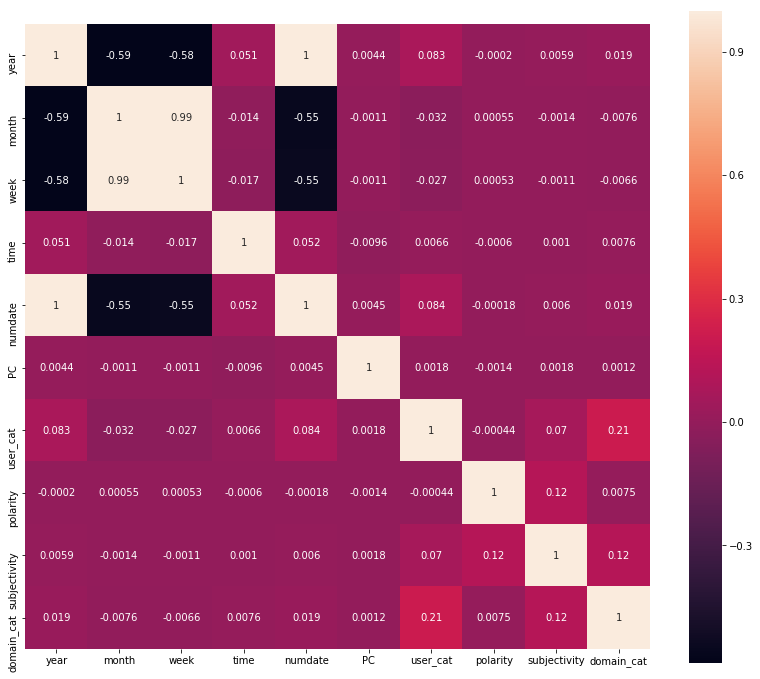

In [12]:
%matplotlib inline
plt.figure(figsize=(14,12))
sns.heatmap(http_info_ARASH.corr(), square=True, annot=True)

#plt.figure(figsize=(14,12))
#sns.pairplot(http_info_ARASH, hue = "domain")

In [13]:
#http_info_ARASH.to_csv('http_info_ARASH.csv',index=False)

In [14]:
dom_size = http_info_ARASH.groupby("domain").agg(['size'])
site_size = data.groupby("website_name").agg(['size'])

In [15]:
site_size.head()

,id,date,user,pc,website,year,month,week,weekday,time,numdate,PC,user_cat,domain,polarity,subjectivity,domain_cat
,size,size,size,size,size,size,size,size,size,size,size,size,size,size,size,size,size
website_name,,,,,,,,,,,,,,,,,
['' 'bee'],11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
['' 'before'],6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
['' 'by'],2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
['' 'come'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
['' 'decision'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Text(0,0.5,'Number Visits')

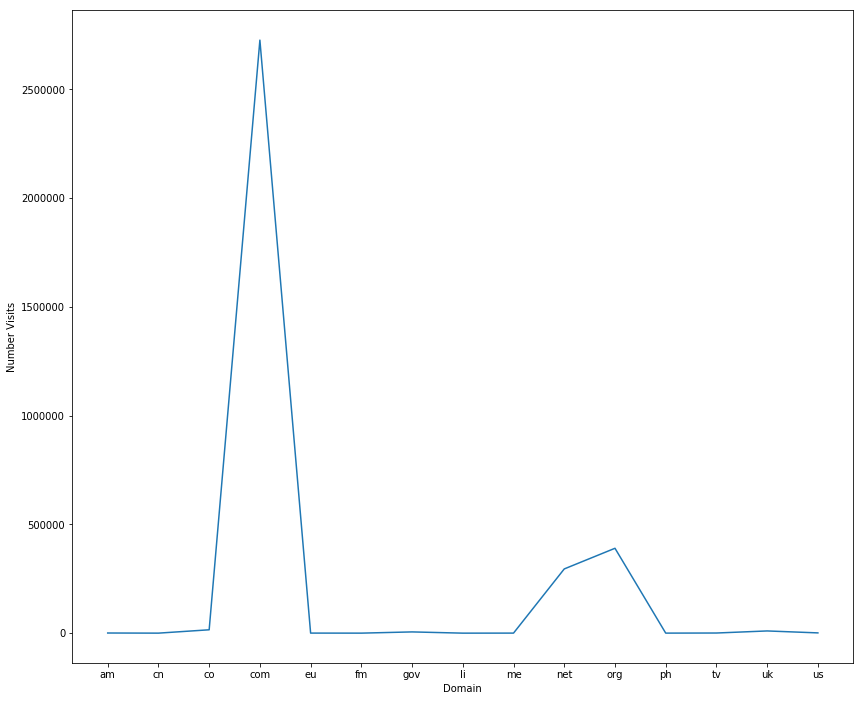

In [19]:
plt.figure(figsize = [14,12])
plt.plot(dom_size.index, dom_size['domain_cat']['size'])
plt.xlabel("Domain")
plt.ylabel("Number Visits")